In [25]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import gmaps
import matplotlib.pyplot as plt


# Google API Key
from config import gkey
from config2 import ykey

In [26]:
zipcode_data = pd.read_csv ("./uszips.csv")
zipcode_data.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,951,18.4284,-66.2566,Toa Baja,PR,Puerto Rico,True,NaN,35,32.5,72137,Toa Baja,{'72137':100},False,False,America/Puerto_Rico
1,96863,21.4484,-157.7623,Mcbh Kaneohe Bay,HI,Hawaii,True,NaN,52,708.1,15003,Honolulu,{'15003':100},False,False,Pacific/Honolulu
2,34141,25.9723,-81.0936,Ochopee,FL,Florida,True,NaN,232,0.1,12021,Collier,"{'12021':97.41,'12087':2.59}",False,False,America/New_York
3,78060,28.4469,-98.1071,Oakville,TX,Texas,True,NaN,37,36.3,48297,Live Oak,{'48297':100},False,False,America/Chicago
4,78144,28.9551,-97.8880,Panna Maria,TX,Texas,True,NaN,45,7.7,48255,Karnes,{'48255':100},False,False,America/Chicago


In [20]:
zipcode_data["zip"].count()

33099

In [27]:
zipcode_data = zipcode_data[["state_id", "zip", "lat", "lng"]]
zipcode_data["gym count"]=""



zipcode_data.head()

,state_id,zip,lat,lng,gym count
0,PR,951,18.4284,-66.2566,
1,HI,96863,21.4484,-157.7623,
2,FL,34141,25.9723,-81.0936,
3,TX,78060,28.4469,-98.1071,
4,TX,78144,28.9551,-97.8880,


In [28]:
state_list = ["NH", "VT", "ME", "NJ", "MA", "NM", "AK", "LA", "SC", "AR"]

zipcode_state_data = zipcode_data[(zipcode_data["state_id"].isin(state_list))]

# zipcode_state_data = zipcode_data[(zipcode_data["state_id"].isin(["CA", "TX"]))]


zipcode_state_data.head()

,state_id,zip,lat,lng,gym count
7,LA,70801,30.4497,-91.1859,
15,NM,88004,32.2231,-106.9874,
17,NM,88055,32.7382,-108.7339,
20,NM,88262,33.1329,-103.4259,
22,SC,29899,33.9279,-82.2507,


In [6]:
# location = [0]
term = "gym"
headers = {"Authorization": f"Bearer {ykey}"}
yelp_base_url = "https://api.yelp.com/v3/businesses/search"
counter = 0


for index, row in zipcode_state_data.iterrows():
    try:
        zipcode = row["zip"]
        
        params_yelp = {"location": zipcode,"limit": 50,"term": term,"radius": 5000}

        response_yelp = requests.get(url = yelp_base_url, params = params_yelp, headers = headers)

        data = response_yelp.json()
#     print(json.dumps(data, indent=4, sort_keys=True))

        total_count = data["total"]
        counter = counter + 1
        
        print (f"{total_count} from {zipcode}, {counter}")
                
        zipcode_state_data.loc[index, "gym count"] = total_count
        
    except:
        print (f"no {zipcode} data")
        continue



22 from 70801, 1


C:\Users\dbche\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0 from 88004, 2
0 from 88055, 3
0 from 88262, 4
0 from 29899, 5
1 from 71998, 6
0 from 88421, 7
0 from 87573, 8
4 from 72467, 9
0 from 87735, 10
99 from 8320, 11
21 from 7939, 12
1 from 7820, 13
9 from 2366, 14
50 from 1066, 15
0 from 4944, 16
0 from 72320, 17
1 from 8327, 18
0 from 72168, 19
0 from 70712, 20
52 from 29409, 21
9 from 29904, 22
0 from 70076, 23
0 from 71644, 24
1 from 8314, 25
26 from 1434, 26
0 from 99510, 27
0 from 99519, 28
0 from 87749, 29
20 from 7703, 30
0 from 87731, 31
1 from 72099, 32
3 from 87117, 33
0 from 72325, 34
0 from 87824, 35
2 from 3754, 36
0 from 88255, 37
3 from 29905, 38
0 from 29051, 39
1 from 70442, 40
1 from 8808, 41
0 from 99734, 42
7 from 8640, 43
0 from 70050, 44
0 from 87730, 45
0 from 70519, 46
25 from 4057, 47
0 from 99704, 48
0 from 72528, 49
0 from 29324, 50
479 from 3911, 51
0 from 88103, 52
3 from 2561, 53
0 from 72379, 54
0 from 71340, 55
0 from 71480, 56
0 from 72108, 57
0 from 88424, 58
0 from 4267, 59
0 from 72571, 60
0 from 87722,

10 from 7924, 463
84 from 1092, 464
0 from 99628, 465
0 from 71371, 466
0 from 71855, 467
0 from 87562, 468
0 from 72080, 469
0 from 72456, 470
0 from 87514, 471
0 from 2791, 472
0 from 3885, 473
0 from 4354, 474
24 from 4422, 475
0 from 99684, 476
0 from 71766, 477
0 from 72166, 478
0 from 71969, 479
0 from 72860, 480
0 from 5766, 481
0 from 99836, 482
0 from 99770, 483
0 from 71968, 484
0 from 72729, 485
0 from 72321, 486
0 from 72747, 487
0 from 99736, 488
0 from 99722, 489
0 from 99766, 490
0 from 70515, 491
0 from 70762, 492
0 from 29936, 493
0 from 71024, 494
0 from 29592, 495
29 from 29601, 496
3 from 87021, 497
7 from 2534, 498
13 from 2542, 499
68 from 1355, 500
1 from 5056, 501
237 from 3595, 502
0 from 99671, 503
0 from 71456, 504
0 from 71435, 505
0 from 29840, 506
0 from 71659, 507
0 from 72367, 508
0 from 87827, 509
0 from 72636, 510
8 from 4777, 511
0 from 99720, 512
0 from 99752, 513
0 from 71426, 514
0 from 88231, 515
0 from 87831, 516
0 from 72768, 517
0 from 87575, 5

0 from 70343, 919
130 from 70113, 920
0 from 70630, 921
0 from 70656, 922
0 from 71341, 923
0 from 88043, 924
0 from 88240, 925
0 from 71018, 926
0 from 88051, 927
0 from 72104, 928
0 from 87036, 929
0 from 29635, 930
0 from 72006, 931
0 from 87013, 932
0 from 72449, 933
0 from 72722, 934
0 from 7758, 935
1200 from 7086, 936
5 from 2671, 937
7 from 3052, 938
28 from 3276, 939
17 from 4002, 940
546 from 4348, 941
0 from 4363, 942
0 from 5648, 943
0 from 5820, 944
0 from 5457, 945
0 from 4462, 946
0 from 99655, 947
1 from 99507, 948
0 from 99777, 949
0 from 71065, 950
21 from 88001, 951
0 from 71647, 952
1 from 87828, 953
0 from 72102, 954
5 from 72901, 955
0 from 87455, 956
0 from 87416, 957
39 from 8805, 958
3 from 7821, 959
17 from 2341, 960
36 from 2108, 961
6 from 1731, 962
458 from 1330, 963
7 from 3037, 964
0 from 4093, 965
22 from 4091, 966
0 from 5036, 967
0 from 4986, 968
0 from 5655, 969
9 from 3576, 970
0 from 5859, 971
0 from 4459, 972
0 from 99926, 973
3 from 99775, 974
0 f

47 from 1467, 1357
11 from 1852, 1358
18 from 3770, 1359
51 from 4101, 1360
68 from 3814, 1361
0 from 3774, 1362
53 from 4350, 1363
0 from 4676, 1364
422 from 4929, 1365
0 from 5830, 1366
0 from 99929, 1367
0 from 70030, 1368
0 from 70052, 1369
0 from 71070, 1370
0 from 71826, 1371
0 from 71770, 1372
0 from 71950, 1373
0 from 29332, 1374
0 from 72083, 1375
0 from 72926, 1376
0 from 72329, 1377
0 from 87506, 1378
0 from 87571, 1379
0 from 72739, 1380
0 from 72751, 1381
0 from 8318, 1382
141 from 8028, 1383
227 from 8090, 1384
28 from 8859, 1385
2 from 8804, 1386
75 from 7204, 1387
75 from 7436, 1388
66 from 2638, 1389
58 from 1604, 1390
360 from 2141, 1391
3 from 1754, 1392
29 from 1541, 1393
1200 from 1054, 1394
287 from 1730, 1395
1200 from 1474, 1396
0 from 5363, 1397
68 from 3036, 1398
32 from 5156, 1399
0 from 5777, 1400
0 from 5034, 1401
13 from 5035, 1402
278 from 3755, 1403
0 from 3768, 1404
17 from 3279, 1405
0 from 4861, 1406
16 from 5086, 1407
12 from 3581, 1408
0 from 5658, 

0 from 87578, 1790
1 from 72762, 1791
0 from 72642, 1792
3 from 8330, 1793
28 from 8753, 1794
16 from 8502, 1795
0 from 7863, 1796
0 from 7073, 1797
0 from 7661, 1798
8 from 2347, 1799
62 from 1245, 1800
1600 from 1803, 1801
112 from 1225, 1802
558 from 1420, 1803
0 from 5301, 1804
37 from 5158, 1805
29 from 3046, 1806
51 from 3904, 1807
14 from 3301, 1808
20 from 3254, 1809
1700 from 3882, 1810
217 from 5772, 1811
206 from 3813, 1812
0 from 4917, 1813
0 from 5846, 1814
66 from 4740, 1815
526 from 4750, 1816
34 from 70056, 1817
10 from 70737, 1818
10 from 70817, 1819
0 from 71343, 1820
0 from 88020, 1821
8 from 88005, 1822
0 from 88012, 1823
0 from 88260, 1824
0 from 71671, 1825
0 from 71859, 1826
6 from 29572, 1827
0 from 29105, 1828
0 from 29384, 1829
0 from 72140, 1830
0 from 72126, 1831
0 from 72372, 1832
1 from 87532, 1833
0 from 87415, 1834
24 from 8077, 1835
4 from 8701, 1836
30 from 7748, 1837
3 from 8825, 1838
56 from 7095, 1839
95 from 8830, 1840
1 from 7974, 1841
1 from 7901

0 from 88426, 2220
0 from 87507, 2221
0 from 87053, 2222
0 from 87313, 2223
0 from 72601, 2224
2 from 72745, 2225
1 from 72719, 2226
0 from 87718, 2227
5 from 8332, 2228
0 from 8328, 2229
12 from 8009, 2230
36 from 8003, 2231
35 from 7712, 2232
109 from 7740, 2233
39 from 7724, 2234
33 from 8832, 2235
41 from 8840, 2236
1 from 8848, 2237
67 from 7065, 2238
67 from 7202, 2239
43 from 7039, 2240
12 from 7028, 2241
0 from 7046, 2242
8 from 7640, 2243
77 from 1550, 2244
0 from 2302, 2245
90 from 1757, 2246
2 from 1069, 2247
2 from 1009, 2248
487 from 1748, 2249
17 from 2114, 2250
8 from 2143, 2251
185 from 1012, 2252
141 from 2180, 2253
17 from 1821, 2254
212 from 1220, 2255
0 from 1844, 2256
14 from 3051, 2257
10 from 1830, 2258
178 from 3455, 2259
117 from 3449, 2260
0 from 5776, 2261
257 from 5089, 2262
0 from 5765, 2263
31 from 5862, 2264
0 from 5640, 2265
3 from 5824, 2266
0 from 4983, 2267
0 from 4942, 2268
0 from 70655, 2269
0 from 70759, 2270
0 from 70639, 2271
0 from 71323, 2272
0

1 from 1077, 2650
64 from 2382, 2651
118 from 1105, 2652
853 from 1537, 2653
56 from 2026, 2654
300 from 2421, 2655
24 from 1960, 2656
593 from 1344, 2657
11 from 1876, 2658
0 from 3752, 2659
0 from 5757, 2660
0 from 5764, 2661
0 from 3766, 2662
45 from 4084, 2663
95 from 3883, 2664
0 from 3818, 2665
106 from 4849, 2666
0 from 4915, 2667
0 from 4966, 2668
0 from 4463, 2669
0 from 4448, 2670
56 from 70124, 2671
0 from 70605, 2672
0 from 70454, 2673
37 from 70808, 2674
2 from 70760, 2675
0 from 71322, 2676
0 from 71469, 2677
0 from 29920, 2678
17 from 29483, 2679
0 from 29018, 2680
0 from 71962, 2681
0 from 29180, 2682
0 from 72103, 2683
1 from 29657, 2684
2 from 29375, 2685
1 from 29302, 2686
0 from 87026, 2687
0 from 72927, 2688
0 from 72943, 2689
0 from 72717, 2690
126 from 8230, 2691
7 from 8085, 2692
7 from 8043, 2693
0 from 8055, 2694
54 from 8102, 2695
28 from 8723, 2696
3 from 8511, 2697
0 from 7755, 2698
no 8810 data
13 from 8904, 2699
2 from 7008, 2700
10 from 8889, 2701
823 fr

0 from 72937, 3082
0 from 72546, 3083
0 from 72479, 3084
0 from 87325, 3085
0 from 87410, 3086
no 8069 data
59 from 8057, 3087
0 from 7072, 3088
152 from 7043, 3089
0 from 7504, 3090
29 from 7430, 3091
7 from 7419, 3092
1200 from 2169, 3093
17 from 2457, 3094
38 from 2119, 3095
1 from 1773, 3096
9 from 3865, 3097
0 from 4548, 3098
2 from 4679, 3099
61 from 3561, 3100
no 5486 data
30 from 5440, 3101
0 from 99591, 3102
0 from 70763, 3103
0 from 70435, 3104
0 from 70777, 3105
6 from 71106, 3106
0 from 88324, 3107
0 from 71958, 3108
0 from 72132, 3109
0 from 29654, 3110
0 from 72170, 3111
0 from 29584, 3112
0 from 29727, 3113
6 from 29320, 3114
0 from 72176, 3115
0 from 72070, 3116
0 from 29368, 3117
0 from 72347, 3118
4 from 72956, 3119
0 from 72395, 3120
2 from 87505, 3121
0 from 72560, 3122
10 from 8223, 3123
5 from 8360, 3124
11 from 8027, 3125
23 from 8691, 3126
67 from 7723, 3127
0 from 8648, 3128
1 from 8802, 3129
0 from 7014, 3130
0 from 7666, 3131
9 from 7670, 3132
0 from 7832, 31

0 from 8226, 3514
35 from 8021, 3515
1 from 8046, 3516
43 from 8518, 3517
26 from 7753, 3518
0 from 7081, 3519
51 from 1366, 3520
47 from 1370, 3521
1 from 3431, 3522
0 from 4106, 3523
0 from 4284, 3524
0 from 70359, 3525
20 from 70815, 3526
0 from 71401, 3527
3 from 71118, 3528
0 from 71245, 3529
45 from 29407, 3530
0 from 71701, 3531
0 from 29168, 3532
0 from 71639, 3533
25 from 29204, 3534
14 from 29229, 3535
0 from 72167, 3536
0 from 72021, 3537
0 from 72842, 3538
36 from 87113, 3539
0 from 72373, 3540
0 from 87319, 3541
0 from 72459, 3542
0 from 8348, 3543
6 from 7018, 3544
1200 from 2646, 3545
49 from 1118, 3546
27 from 2458, 3547
73 from 2152, 3548
192 from 1775, 3549
0 from 3811, 3550
0 from 5084, 3551
1 from 3832, 3552
623 from 4614, 3553
5 from 70601, 3554
0 from 71354, 3555
0 from 88021, 3556
0 from 88027, 3557
0 from 71759, 3558
0 from 29001, 3559
0 from 29546, 3560
3 from 29377, 3561
0 from 72331, 3562
1 from 72730, 3563
0 from 72734, 3564
79 from 7735, 3565
172 from 7305,

0 from 29843, 3947
0 from 87723, 3948
48 from 1718, 3949
33 from 4050, 3950
514 from 4538, 3951
0 from 71049, 3952
0 from 29481, 3953
0 from 72130, 3954
11 from 2641, 3955
0 from 5762, 3956
0 from 4234, 3957
0 from 70662, 3958
0 from 87829, 3959
0 from 29686, 3960
0 from 72520, 3961
0 from 4286, 3962
0 from 4454, 3963
0 from 87535, 3964
31 from 8528, 3965
1 from 2535, 3966
no 5744 data
0 from 5664, 3967
0 from 71362, 3968
0 from 29037, 3969
0 from 88353, 3970
0 from 4653, 3971
0 from 70086, 3972
0 from 70531, 3973
2 from 4109, 3974
14 from 29423, 3975
0 from 29448, 3976
0 from 88114, 3977
0 from 72359, 3978
8 from 1229, 3979
0 from 87742, 3980
1 from 8751, 3981
0 from 70532, 3982
0 from 72564, 3983
96 from 7979, 3984
44 from 1084, 3985
0 from 29321, 3986
20 from 7856, 3987
0 from 71021, 3988
no 8072 data
0 from 29145, 3989
0 from 72389, 3990
0 from 72444, 3991
23 from 1060, 3992
57 from 3233, 3993
0 from 71007, 3994
0 from 88348, 3995
0 from 29331, 3996
0 from 71369, 3997
0 from 88342,

In [7]:
zipcode_state_data.head(20)

,state_id,zip,lat,lng,gym count
7,LA,70801,30.4497,-91.1859,22
15,NM,88004,32.2231,-106.9874,0
17,NM,88055,32.7382,-108.7339,0
20,NM,88262,33.1329,-103.4259,0
22,SC,29899,33.9279,-82.2507,0
24,AR,71998,34.1258,-93.0537,1
31,NM,88421,35.2983,-104.4813,0
32,NM,87573,35.7728,-105.6712,0
33,AR,72467,35.8411,-90.6756,4
34,NM,87735,36.0734,-105.1471,0


In [8]:
zipcode_state_data.to_csv("zipcode gym count.csv")

In [29]:
zipcode_gym_data = pd.read_csv ("./zipcode gym count.csv")
zipcode_gym_data.head()

,Unnamed: 0,state_id,zip,lat,lng,gym count
0,7,LA,70801,30.4497,-91.1859,22.0
1,15,NM,88004,32.2231,-106.9874,0.0
2,17,NM,88055,32.7382,-108.7339,0.0
3,20,NM,88262,33.1329,-103.4259,0.0
4,22,SC,29899,33.9279,-82.2507,0.0


In [50]:

fig = gmaps.figure()
locations = zipcode_gym_data[["lat", "lng"]].astype(float)
gym_count = zipcode_gym_data["gym count"].astype(float)
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=gym_count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 0.5)



fig.add_layer(heat_layer)

fig



Figure(layout=FigureLayout(height='420px'))

In [31]:
state_list

['NH', 'VT', 'ME', 'NJ', 'MA', 'NM', 'AK', 'LA', 'SC', 'AR']

In [39]:
gym_count = []
for state in state_list:
    zipcode_state_data = zipcode_gym_data[(zipcode_gym_data["state_id"]==state)].sum()["gym count"]

    gym_count.append(zipcode_state_data)
    
    

gym_count_sate = pd.DataFrame({"State": state_list, "Total Gym Count": gym_count})

gym_count_sate

,State,Total Gym Count
0,NH,21937.0
1,VT,8941.0
2,ME,17001.0
3,NJ,23694.0
4,MA,89611.0
5,NM,756.0
6,AK,108.0
7,LA,2392.0
8,SC,1297.0
9,AR,276.0


In [47]:
# zipcode_state_data_1= zipcode_gym_data.groupby("state_id").sum()["gym count"]




state_id
AK      108.0
AR      276.0
LA     2392.0
MA    89611.0
ME    17001.0
NH    21937.0
NJ    23694.0
NM      756.0
SC     1297.0
VT     8941.0
Name: gym count, dtype: float64

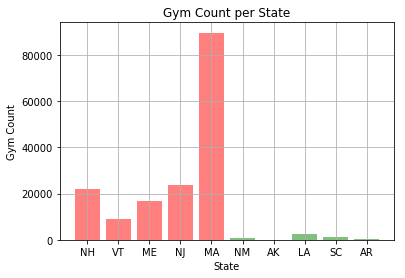

In [40]:
colors = ["r","r","r","r","r","g","g","g","g","g"]

plt.bar(state_list, gym_count, color=colors, alpha=0.5, align="center")
plt.grid()
plt.title("Gym Count per State")
plt.ylabel("Gym Count")
plt.xlabel("State")

plt.savefig("Gym Count in Top 5 and Bottom 5 State Crime Rate")
